## Preprocessing - Data checks

### Import packages and set fixed variables

In [1]:
import os

# set fsl path
fslpath="/usr/share/fsl/5.0" 
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, "bin")
!. ${FSLDIR}/etc/fslconf/fsl.sh
!export FSLDIR PATH

In [2]:
# Import necessary packages and modules
%matplotlib inline
import numpy as np
import nibabel as nib
import pandas as pd
from nipype import Node, Workflow
from nipype.interfaces import fsl
from nipype.interfaces.io import SelectFiles, DataSink
from nipype.interfaces.utility import IdentityInterface
from nipype.algorithms.rapidart import ArtifactDetect
from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting, datasets, image
from matplotlib import pyplot as plt

/home/usr/miniconda3/envs/neuroenv/lib/python3.11/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [4]:
# set paths for experiment dir, working dir and output dir
working_dir = "/output/working_dir"
data_dir = "/mnt/d/Research/01_AON_ACTION/01_data"
output_dir = "/output"

# define the ID of your subject
subject_list = ["sub-09", "sub-10"] # add more sbj-IDs to the list if you want to preprocess them as well 

### Inspect data

Subject: sub-09
Slices: 52 Voxel size: 2.0 TR: 1.2 TA: 1.1769231236897981
Shape of anatomical data: (176, 256, 256)
Shape of functional data: (96, 96, 52, 272)
Subject: sub-10
Slices: 52 Voxel size: 2.0 TR: 1.2 TA: 1.1769231236897981
Shape of anatomical data: (176, 256, 256)
Shape of functional data: (96, 96, 52, 272)


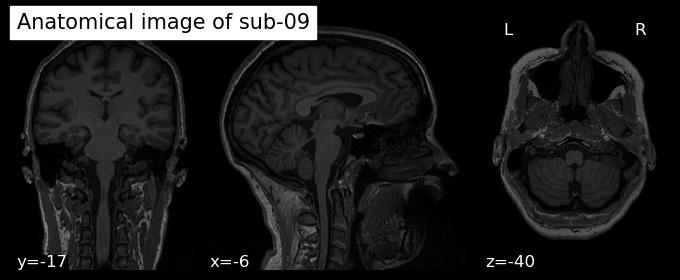

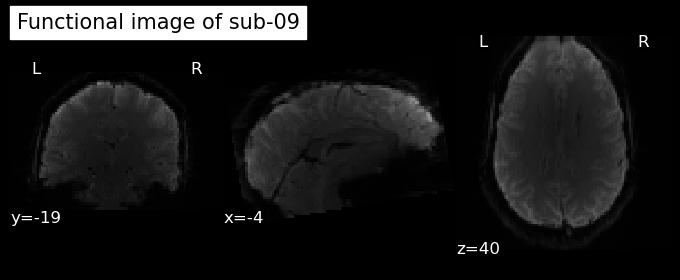

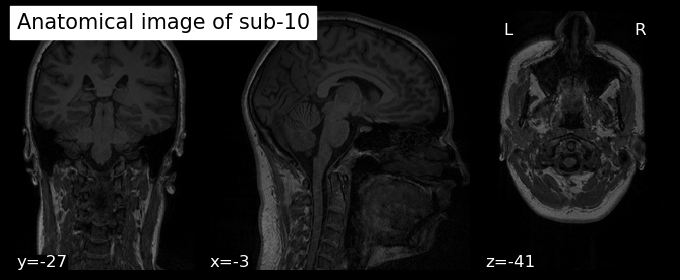

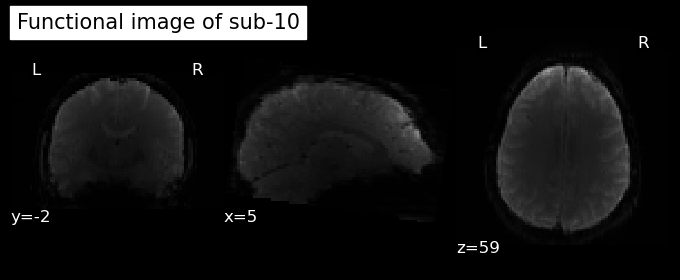

In [12]:
for sbj in subject_list:
 
  anat_dir = f"{data_dir}/{sbj}/anat/{sbj}_T1w.nii.gz"
  func_dir = f"{data_dir}/{sbj}/func/{sbj}_task-AON_run-01_bold.nii.gz"
  
  # load anatomical img 
  anat_img = nib.load(anat_dir)
  anat_data = anat_img.get_fdata()
  anat_header = anat_img.header 
  
  # load functional img 
  func_img = nib.load(func_dir)
  func_data = func_img.get_fdata()
  func_header = func_img.header 
  
  # define variables for the number of slices, the voxel size, tr and ta
  slices = func_data.shape[2]
  voxel_size = func_header.get_zooms()[0]
  TR = func_header.get_zooms()[3]
  
  # calculate ta from tr and slices
  TA = TR - (TR/slices)

  print("Subject:", sbj)
  print("Slices:", slices, "Voxel size:", voxel_size, "TR:", TR, "TA:", TA)
  print("Shape of anatomical data:", anat_data.shape)
  print("Shape of functional data:", func_data.shape)

  # plot both the anatomical and functional raw image
  
  # anatomical plot
  plotting.plot_anat(anat_img, title = f"Anatomical image of {sbj}", draw_cross = False)
  
  # functional plot
  func_img_mean = image.mean_img(func_dir)
  plotting.plot_anat(func_img_mean, title = f"Functional image of {sbj}", draw_cross = False, black_bg = True)